Importing the dependencies

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


 Data collection and processing

In [52]:
# loading the csv dataa to a pandas dataframe
#var for the dataframe which will contain the dataset declaration
heart_data1 = pd.read_csv('/content/heart dataset.csv')
heart_data2=pd.read_csv('/content/heart dataset.csv')
heart_data3=pd.read_csv('/content/heart dataset.csv')
heart_data4=pd.read_csv('/content/heart dataset.csv')
heart_data5=pd.read_csv('/content/heart dataset.csv')

In [53]:
 #print first 5 rows of the dataset
 heart_data1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
#print last 5 rows of dataset
heart_data1.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [55]:
#print number of rows and colums in dataset
heart_data1.shape

(303, 14)

In [56]:
Frames=[heart_data1,heart_data2,heart_data3]
heart_data=pd.concat(Frames)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
heart_data.shape

(909, 14)

In [58]:
#getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       909 non-null    int64  
 1   sex       909 non-null    int64  
 2   cp        909 non-null    int64  
 3   trestbps  909 non-null    int64  
 4   chol      909 non-null    int64  
 5   fbs       909 non-null    int64  
 6   restecg   909 non-null    int64  
 7   thalach   909 non-null    int64  
 8   exang     909 non-null    int64  
 9   oldpeak   909 non-null    float64
 10  slope     909 non-null    int64  
 11  ca        909 non-null    int64  
 12  thal      909 non-null    int64  
 13  target    909 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 106.5 KB


age - age in years

```
`# This is formatted as code`
```


sex - sex (1 = male; 0 = female)
cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
restecg - resting electrocardiographic results (0 = normal; 1 = having ST-T; 2 = hypertrophy)
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment (1 = upsloping; 2 = flat; 3 = downsloping)
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

In [59]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.072093,0.465497,1.030915,17.518817,51.773637,0.355805,0.525280,22.879921,0.469277,1.159796,0.615547,1.021480,0.611602,0.498285
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [61]:
#checking the distribution of target variable
heart_data['target'].value_counts()

1    495
0    414
Name: target, dtype: int64

1 --> defective heart
0 --> healthy heart

Splitting the Features and target

In [62]:
X = heart_data.drop(columns='target',axis=1)
Y = heart_data['target']

In [63]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [64]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 909, dtype: int64


Splitting data into training data and testing data

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)



In [66]:
print(X.shape,X_train.shape,X_test.shape)

(909, 13) (727, 13) (182, 13)


Model training - Logistic Regression Model

> Indented block



In [67]:
model = LogisticRegression()

In [68]:
#training the LogisticRegression Model with training data
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
Y_pred=model.predict(X_test)

In [70]:
import sklearn
sklearn.metrics.accuracy_score(Y_test,Y_pred)

0.8406593406593407

<Axes: >

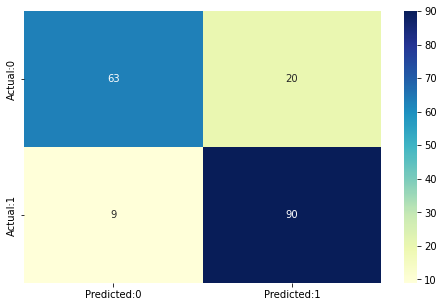

In [71]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Model Evaluation - Accuracy Score

In [72]:
#Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [73]:
print("Accuracy on training data: ", training_data_accuracy)

Accuracy on training data:  0.8459422283356258


In [74]:
#Accuracy on testing data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [75]:
print("Accuracy on testing data: ", test_data_accuracy)

Accuracy on testing data:  0.8406593406593407


Building a predicting system

In [80]:
input_data=(46,0,0,138,243,0,0,152,1,0,1,0,2)

# change the input data to a numpy array to make it easy to reshape
input_data_as_numpy_arrya= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on one instance
input_data_reshaped= input_data_as_numpy_arrya.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print("the person does not have a heart disease")
else:
  print("the person has heart disease")

[1]
the person has heart disease


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [81]:
import pickle

In [82]:
filename='newfinal_heart.sav'
pickle.dump(model, open(filename,'wb'))

In [83]:
loaded_model=pickle.load(open('newfinal_heart.sav','rb'))